<a href="https://colab.research.google.com/github/202422/Delivery-Duration-Prediction/blob/main/Feature%20engineering/Feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [17]:
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("/content/data_processed.csv")
df

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3.0,4,4771,3,820,1604,8.0,6.0,18.0,446,289.0
3,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,446,795.0
4,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,446,205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0,251,331.0
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0,251,915.0
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0,251,795.0
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0,446,384.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136482 entries, 0 to 136481
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   created_at                                    136482 non-null  object 
 1   actual_delivery_time                          136482 non-null  object 
 2   store_primary_category                        136482 non-null  object 
 3   order_protocol                                136482 non-null  float64
 4   total_items                                   136482 non-null  int64  
 5   subtotal                                      136482 non-null  int64  
 6   num_distinct_items                            136482 non-null  int64  
 7   min_item_price                                136482 non-null  int64  
 8   max_item_price                                136482 non-null  int64  
 9   total_onshift_dashers                         13

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['store_primary_category'] = df['store_primary_category'].astype("category")
df['order_protocol'] = df['order_protocol'].astype(int)
df['total_items'] = df['total_items'].astype(int)
df['subtotal'] = df['subtotal'].astype(int)
df['num_distinct_items'] = df['num_distinct_items'].astype(int)
df['min_item_price'] = df['min_item_price'].astype(int)
df['max_item_price'] = df['max_item_price'].astype(int)
df['total_onshift_dashers'] = df['total_onshift_dashers'].astype(int)
df['total_busy_dashers'] = df['total_busy_dashers'].astype(int)
df['total_outstanding_orders'] = df['total_outstanding_orders'].astype(int)
df['estimated_order_place_duration'] = df['estimated_order_place_duration'].astype(int)
df['estimated_store_to_consumer_driving_duration'] = df['estimated_store_to_consumer_driving_duration'].astype(int)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136482 entries, 0 to 136481
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   created_at                                    136482 non-null  datetime64[ns]
 1   actual_delivery_time                          136482 non-null  datetime64[ns]
 2   store_primary_category                        136482 non-null  category      
 3   order_protocol                                136482 non-null  int64         
 4   total_items                                   136482 non-null  int64         
 5   subtotal                                      136482 non-null  int64         
 6   num_distinct_items                            136482 non-null  int64         
 7   min_item_price                                136482 non-null  int64         
 8   max_item_price                                136482 n

In [6]:
df.columns

Index(['created_at', 'actual_delivery_time', 'store_primary_category',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration'],
      dtype='object')

In [7]:
num_feat = ['total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration']

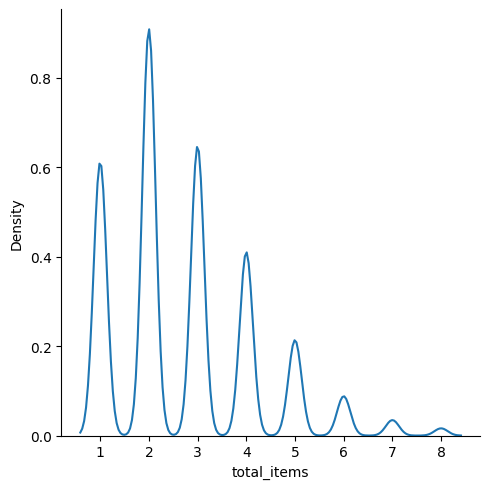

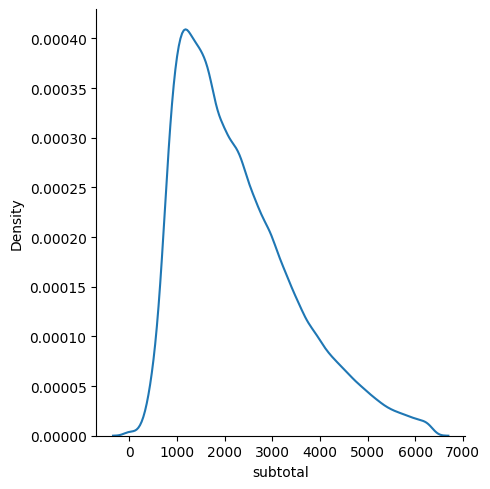

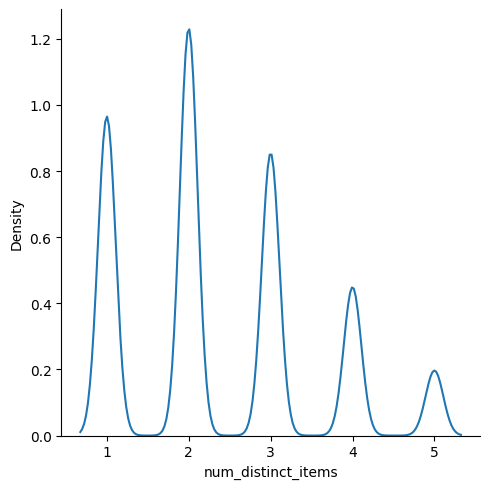

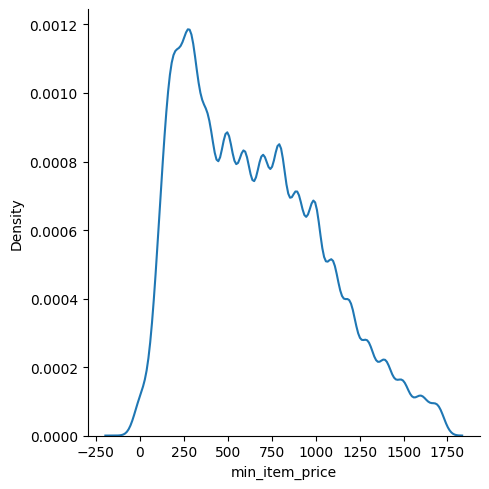

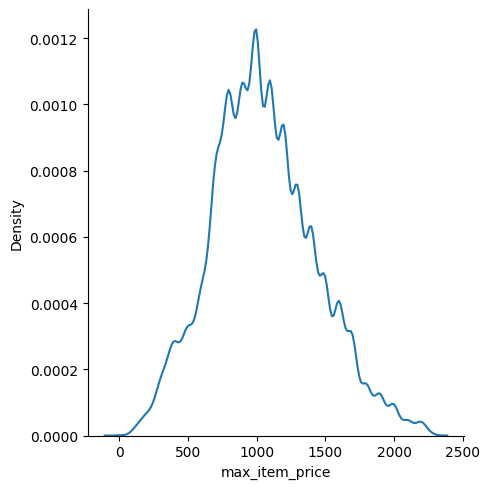

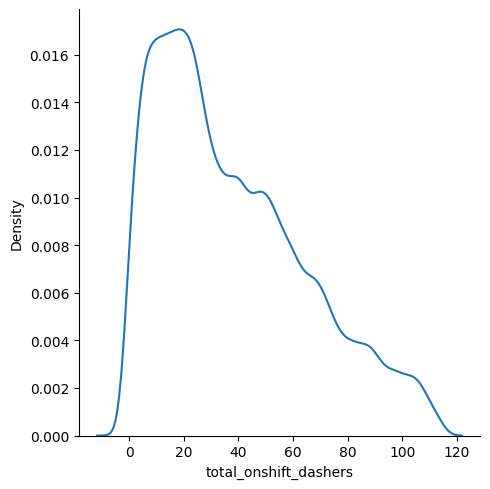

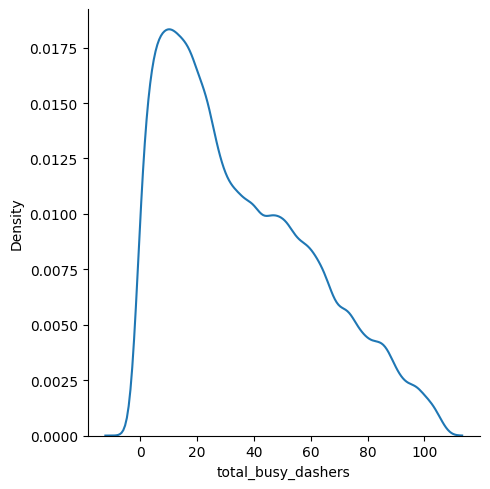

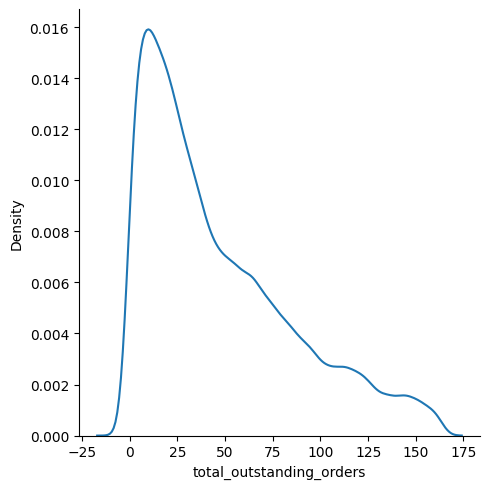

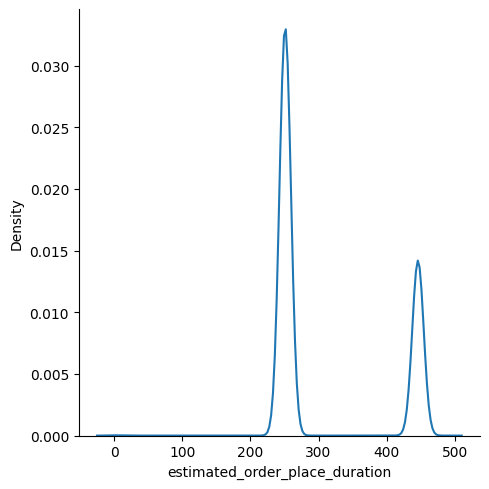

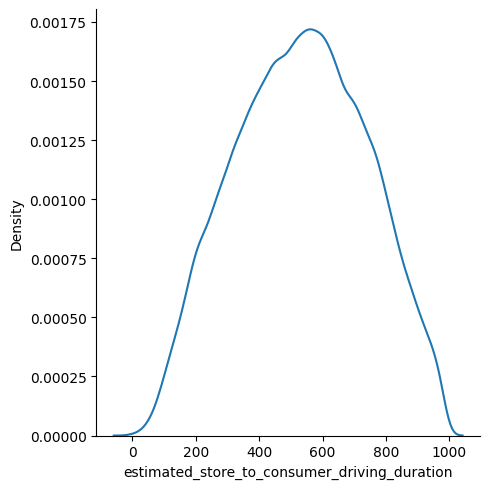

In [8]:
# Verifying the distribution of numerical features
for col in num_feat:
    sns.displot(data = df, x = col, kind = "kde")

In [9]:
for var in num_feat:
    print(df[var].skew())

0.910021470812201
0.9024378537530255
0.5638961725692471
0.5402767246280716
0.31381194575444443
0.710811226827926
0.6349232916062827
0.9677240829627725
0.848409089991953
-0.02935746341821521


In [10]:
df["Delivery_Duration"] = (df['actual_delivery_time']-df['created_at']).dt.seconds
df["created_at_year"] = df['created_at'].dt.year
df["created_at_month"] = df['created_at'].dt.month
df["created_at_day"] = df['created_at'].dt.day
df["created_at_hour"] = df["created_at"].dt.hour
df["created_at_minutes"] = df['created_at'].dt.minute
df

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery_Duration,created_at_year,created_at_month,created_at_day,created_at_hour,created_at_minutes
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1,4,3441,4,557,1239,33,14,21,446,861,3779,2015,2,6,22,24
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2,1,1900,1,1400,1400,1,2,2,446,690,4024,2015,2,10,21,49
2,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3,4,4771,3,820,1604,8,6,18,446,289,1586,2015,2,16,0,11
3,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1,1,1525,1,1525,1525,5,6,8,446,795,2273,2015,2,12,3,36
4,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1,2,3620,2,1425,2195,5,5,7,446,205,2988,2015,1,27,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4,3,1389,3,345,649,17,17,23,251,331,3907,2015,2,17,0,19
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4,6,3010,4,405,825,12,11,14,251,915,3383,2015,2,13,0,1
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4,5,1836,3,300,399,39,41,40,251,795,3008,2015,1,24,4,46
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1,1,1175,1,535,535,7,7,12,446,384,3907,2015,2,1,18,18


In [11]:
df["actual_delivery_time_year"] = df['actual_delivery_time'].dt.year
df["actual_delivery_time_month"] = df['actual_delivery_time'].dt.month
df["actual_delivery_time_day"] = df['actual_delivery_time'].dt.day
df["actual_delivery_time_hour"] = df["actual_delivery_time"].dt.hour
df["actual_delivery_time_minutes"] = df['actual_delivery_time'].dt.minute
df

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,created_at_year,created_at_month,created_at_day,created_at_hour,created_at_minutes,actual_delivery_time_year,actual_delivery_time_month,actual_delivery_time_day,actual_delivery_time_hour,actual_delivery_time_minutes
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1,4,3441,4,557,1239,33,...,2015,2,6,22,24,2015,2,6,23,27
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2,1,1900,1,1400,1400,1,...,2015,2,10,21,49,2015,2,10,22,56
2,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3,4,4771,3,820,1604,8,...,2015,2,16,0,11,2015,2,16,0,38
3,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1,1,1525,1,1525,1525,5,...,2015,2,12,3,36,2015,2,12,4,14
4,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1,2,3620,2,1425,2195,5,...,2015,1,27,2,12,2015,1,27,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4,3,1389,3,345,649,17,...,2015,2,17,0,19,2015,2,17,1,24
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4,6,3010,4,405,825,12,...,2015,2,13,0,1,2015,2,13,0,58
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4,5,1836,3,300,399,39,...,2015,1,24,4,46,2015,1,24,5,36
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1,1,1175,1,535,535,7,...,2015,2,1,18,18,2015,2,1,19,23


In [12]:
df['created_at_year'].value_counts()

,count
created_at_year,
2015,136482


In [13]:
df['actual_delivery_time_year'].value_counts()

,count
actual_delivery_time_year,
2015,136482


In [14]:
df['actual_delivery_time_month'].value_counts()

,count
actual_delivery_time_month,
2,88511
1,47971


In [15]:
df['created_at_month'].value_counts()

,count
created_at_month,
2,88320
1,48162


In [16]:
df.drop(columns=["created_at_year", "actual_delivery_time_year"], inplace = True, axis = 1 )

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,...,estimated_store_to_consumer_driving_duration,Delivery_Duration,created_at_month,created_at_day,created_at_hour,created_at_minutes,actual_delivery_time_month,actual_delivery_time_day,actual_delivery_time_hour,actual_delivery_time_minutes
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1,4,3441,4,557,1239,33,...,861,3779,2,6,22,24,2,6,23,27
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2,1,1900,1,1400,1400,1,...,690,4024,2,10,21,49,2,10,22,56
2,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3,4,4771,3,820,1604,8,...,289,1586,2,16,0,11,2,16,0,38
3,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1,1,1525,1,1525,1525,5,...,795,2273,2,12,3,36,2,12,4,14
4,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1,2,3620,2,1425,2195,5,...,205,2988,1,27,2,12,1,27,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4,3,1389,3,345,649,17,...,331,3907,2,17,0,19,2,17,1,24
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4,6,3010,4,405,825,12,...,915,3383,2,13,0,1,2,13,0,58
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4,5,1836,3,300,399,39,...,795,3008,1,24,4,46,1,24,5,36
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1,1,1175,1,535,535,7,...,384,3907,2,1,18,18,2,1,19,23


In [19]:
df

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery_Duration,created_at_month,created_at_day,created_at_hour,created_at_minutes,actual_delivery_time_month,actual_delivery_time_day,actual_delivery_time_hour,actual_delivery_time_minutes
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1,4,3441,4,557,1239,33,14,21,446,861,3779,2,6,22,24,2,6,23,27
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2,1,1900,1,1400,1400,1,2,2,446,690,4024,2,10,21,49,2,10,22,56
2,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3,4,4771,3,820,1604,8,6,18,446,289,1586,2,16,0,11,2,16,0,38
3,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1,1,1525,1,1525,1525,5,6,8,446,795,2273,2,12,3,36,2,12,4,14
4,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1,2,3620,2,1425,2195,5,5,7,446,205,2988,1,27,2,12,1,27,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4,3,1389,3,345,649,17,17,23,251,331,3907,2,17,0,19,2,17,1,24
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4,6,3010,4,405,825,12,11,14,251,915,3383,2,13,0,1,2,13,0,58
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4,5,1836,3,300,399,39,41,40,251,795,3008,1,24,4,46,1,24,5,36
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1,1,1175,1,535,535,7,7,12,446,384,3907,2,1,18,18,2,1,19,23


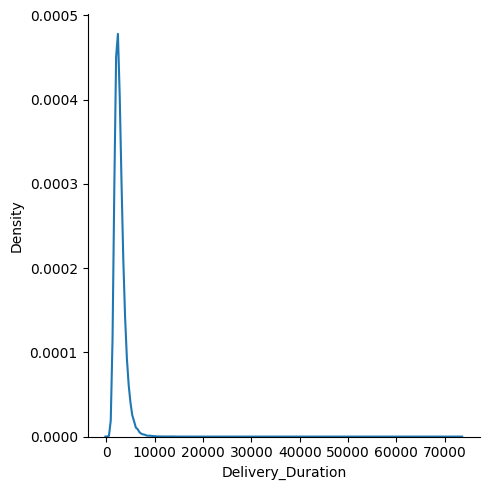

In [20]:
sns.displot(data = df, x = "Delivery_Duration", kind = "kde")

In [22]:
df.columns

Index(['created_at', 'actual_delivery_time', 'store_primary_category',
       'order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'Delivery_Duration',
       'created_at_month', 'created_at_day', 'created_at_hour',
       'created_at_minutes', 'actual_delivery_time_month',
       'actual_delivery_time_day', 'actual_delivery_time_hour',
       'actual_delivery_time_minutes'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136482 entries, 0 to 136481
Data columns (total 23 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   created_at                                    136482 non-null  datetime64[ns]
 1   actual_delivery_time                          136482 non-null  datetime64[ns]
 2   store_primary_category                        136482 non-null  category      
 3   order_protocol                                136482 non-null  int64         
 4   total_items                                   136482 non-null  int64         
 5   subtotal                                      136482 non-null  int64         
 6   num_distinct_items                            136482 non-null  int64         
 7   min_item_price                                136482 non-null  int64         
 8   max_item_price                                136482 n

In [25]:
features_to_scale = ['total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_dashers',
       'total_busy_dashers', 'total_outstanding_orders',
       'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration',
       ]

In [26]:
scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [27]:
df

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery_Duration,created_at_month,created_at_day,created_at_hour,created_at_minutes,actual_delivery_time_month,actual_delivery_time_day,actual_delivery_time_hour,actual_delivery_time_minutes
0,2015-02-06 22:24:17,2015-02-06 23:27:16,american,1,0.881706,0.976818,1.417316,-0.225554,0.491667,-0.174460,-0.822359,-0.655351,1.525031,1.588659,3779,2,6,22,24,2,6,23,27
1,2015-02-10 21:49:25,2015-02-10 22:56:29,mexican,2,-1.189868,-0.294604,-1.195571,1.943361,0.914430,-1.339853,-1.283129,-1.138113,1.525031,0.763220,4024,2,10,21,49,2,10,22,56
2,2015-02-16 00:11:35,2015-02-16 00:38:01,indian,3,0.881706,2.074152,0.546354,0.451107,1.450106,-1.084923,-1.129539,-0.731576,1.525031,-1.172459,1586,2,16,0,11,2,16,0,38
3,2015-02-12 03:36:46,2015-02-12 04:14:39,italian,1,-1.189868,-0.604002,-1.195571,2.264968,1.242663,-1.194179,-1.129539,-0.985662,1.525031,1.270069,2273,2,12,3,36,2,12,4,14
4,2015-01-27 02:12:36,2015-01-27 03:02:24,italian,1,-0.499343,1.124505,-0.324609,2.007682,3.001989,-1.194179,-1.167937,-1.011070,1.525031,-1.577937,2988,1,27,2,12,1,27,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,fast,4,0.191182,-0.716211,0.546354,-0.770999,-1.057591,-0.757157,-0.707167,-0.604534,-0.650744,-0.969719,3907,2,17,0,19,2,17,1,24
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,fast,4,2.262756,0.621216,1.417316,-0.616627,-0.595439,-0.939249,-0.937552,-0.833211,-0.650744,1.849324,3383,2,13,0,1,2,13,0,58
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,fast,4,1.572231,-0.347408,0.546354,-0.886777,-1.714056,0.044051,0.214373,-0.172589,-0.650744,1.270069,3008,1,24,4,46,1,24,5,36
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,sandwich,1,-1.189868,-0.892774,-1.195571,-0.282157,-1.356939,-1.121342,-1.091142,-0.884028,1.525031,-0.713881,3907,2,1,18,18,2,1,19,23


In [29]:
Encoder = LabelEncoder()
df["store_primary_category"] = Encoder.fit_transform(df["store_primary_category"])

In [30]:
df

,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery_Duration,created_at_month,created_at_day,created_at_hour,created_at_minutes,actual_delivery_time_month,actual_delivery_time_day,actual_delivery_time_hour,actual_delivery_time_minutes
0,2015-02-06 22:24:17,2015-02-06 23:27:16,4,1,0.881706,0.976818,1.417316,-0.225554,0.491667,-0.174460,-0.822359,-0.655351,1.525031,1.588659,3779,2,6,22,24,2,6,23,27
1,2015-02-10 21:49:25,2015-02-10 22:56:29,45,2,-1.189868,-0.294604,-1.195571,1.943361,0.914430,-1.339853,-1.283129,-1.138113,1.525031,0.763220,4024,2,10,21,49,2,10,22,56
2,2015-02-16 00:11:35,2015-02-16 00:38:01,35,3,0.881706,2.074152,0.546354,0.451107,1.450106,-1.084923,-1.129539,-0.731576,1.525031,-1.172459,1586,2,16,0,11,2,16,0,38
3,2015-02-12 03:36:46,2015-02-12 04:14:39,37,1,-1.189868,-0.604002,-1.195571,2.264968,1.242663,-1.194179,-1.129539,-0.985662,1.525031,1.270069,2273,2,12,3,36,2,12,4,14
4,2015-01-27 02:12:36,2015-01-27 03:02:24,37,1,-0.499343,1.124505,-0.324609,2.007682,3.001989,-1.194179,-1.167937,-1.011070,1.525031,-1.577937,2988,1,27,2,12,1,27,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,2015-02-17 00:19:41,2015-02-17 01:24:48,27,4,0.191182,-0.716211,0.546354,-0.770999,-1.057591,-0.757157,-0.707167,-0.604534,-0.650744,-0.969719,3907,2,17,0,19,2,17,1,24
136478,2015-02-13 00:01:59,2015-02-13 00:58:22,27,4,2.262756,0.621216,1.417316,-0.616627,-0.595439,-0.939249,-0.937552,-0.833211,-0.650744,1.849324,3383,2,13,0,1,2,13,0,58
136479,2015-01-24 04:46:08,2015-01-24 05:36:16,27,4,1.572231,-0.347408,0.546354,-0.886777,-1.714056,0.044051,0.214373,-0.172589,-0.650744,1.270069,3008,1,24,4,46,1,24,5,36
136480,2015-02-01 18:18:15,2015-02-01 19:23:22,57,1,-1.189868,-0.892774,-1.195571,-0.282157,-1.356939,-1.121342,-1.091142,-0.884028,1.525031,-0.713881,3907,2,1,18,18,2,1,19,23


In [32]:
df_final = df.drop(columns = ["created_at","actual_delivery_time"], axis = 1)
df_final

,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,Delivery_Duration,created_at_month,created_at_day,created_at_hour,created_at_minutes,actual_delivery_time_month,actual_delivery_time_day,actual_delivery_time_hour,actual_delivery_time_minutes
0,4,1,0.881706,0.976818,1.417316,-0.225554,0.491667,-0.174460,-0.822359,-0.655351,1.525031,1.588659,3779,2,6,22,24,2,6,23,27
1,45,2,-1.189868,-0.294604,-1.195571,1.943361,0.914430,-1.339853,-1.283129,-1.138113,1.525031,0.763220,4024,2,10,21,49,2,10,22,56
2,35,3,0.881706,2.074152,0.546354,0.451107,1.450106,-1.084923,-1.129539,-0.731576,1.525031,-1.172459,1586,2,16,0,11,2,16,0,38
3,37,1,-1.189868,-0.604002,-1.195571,2.264968,1.242663,-1.194179,-1.129539,-0.985662,1.525031,1.270069,2273,2,12,3,36,2,12,4,14
4,37,1,-0.499343,1.124505,-0.324609,2.007682,3.001989,-1.194179,-1.167937,-1.011070,1.525031,-1.577937,2988,1,27,2,12,1,27,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136477,27,4,0.191182,-0.716211,0.546354,-0.770999,-1.057591,-0.757157,-0.707167,-0.604534,-0.650744,-0.969719,3907,2,17,0,19,2,17,1,24
136478,27,4,2.262756,0.621216,1.417316,-0.616627,-0.595439,-0.939249,-0.937552,-0.833211,-0.650744,1.849324,3383,2,13,0,1,2,13,0,58
136479,27,4,1.572231,-0.347408,0.546354,-0.886777,-1.714056,0.044051,0.214373,-0.172589,-0.650744,1.270069,3008,1,24,4,46,1,24,5,36
136480,57,1,-1.189868,-0.892774,-1.195571,-0.282157,-1.356939,-1.121342,-1.091142,-0.884028,1.525031,-0.713881,3907,2,1,18,18,2,1,19,23


In [33]:
df_final.to_csv("dataset_features_handled.csv", index = False)